In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import pandas as pd

In [3]:
#function for MSD calculation
def msd(element, traj):#input the element you want to compute, and trajectories
    top = traj.topology
    index = []
    for i in range(len(list(top.atoms))):#get the index of target element
        if (str(top.atom(i)).split('-')[1]) == element:
            index.append(i)
    time = list(traj.time)[1:]#time 
    wholepos = traj.xyz
    msd = []
    
    for t in range(len(time)):#compute the msd and append to the msd list
        po = []
        pt = []
        for p in index:
            po.append(wholepos[t][p])
            pt.append(wholepos[t+1][p])
        sum = 0
        for s in range(len(po)):
            sum += (pt[s][0]-po[s][0])**2+(pt[s][1]-po[s][1])**2+(pt[s][2]-po[s][2])**2
        if sum == 0:
            sum = msd[-1]*len(po)
        msd.append(sum/len(po))
    return [msd,time]
    

In [4]:
#import data
with open("gyrate.xvg") as f:
    gyration = f.read()
    gyration = gyration.split('\n')

traj_protein = md.load_xtc('protein_combine_center_nowater.xtc', top = '2jof_proa.pdb')

traj_NaCl = md.load_xtc('NaCl_combinetrj_unwrap.xtc', top = 'step5_9_NaCl.gro')


ASP1-C
SER20-C


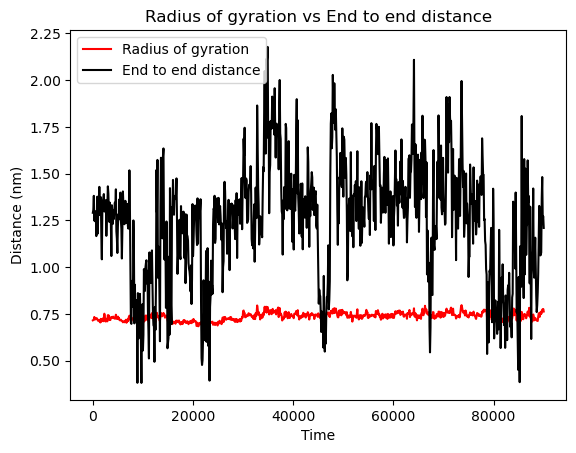

In [25]:
#Radius of gyration
#data cleaning
t = []#time
Gy = []#gyration
for line in gyration[:-1]:
    if "#" in line:
        continue
    if "@" in line:
        continue
    x = line.strip().split(' ')
    while '' in x:
        x.remove('')
    t.append(float(x[0]))
    Gy.append(float(x[1]))
    
# End to end distance
# acquire the end to end distance from data
top = traj_protein.topology
distancebetweenatom =[]
print(top.atom(2))#carbon of first residue
print(top.atom(274))#carbon of last resifue
for dis in md.compute_distances(traj_protein, [[2,274]]):
    distancebetweenatom.append(dis[0])

#plot
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title(r'Radius of gyration vs End to end distance')    
ax1.set_xlabel('Time')
ax1.set_ylabel('Distance (nm)')
ax1.plot(t,Gy, c='r', label = 'Radius of gyration')
ax1.plot(t,distancebetweenatom, c = 'k', label = 'End to end distance')
ax1.legend()
#plt.savefig('Rg vs end_to_end_distand.png')
plt.show() 

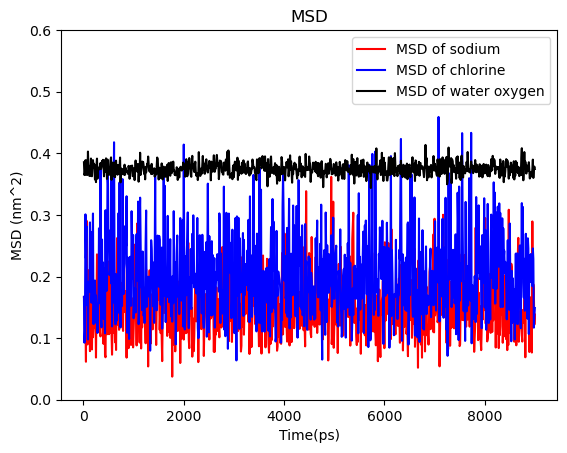

In [8]:
#MSD of each element: SOD, CLA, OH2
sod = msd("SOD", traj_NaCl)
cla = msd("CLA", traj_NaCl)
O = msd("O", traj_NaCl)
#plot 
fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.set_title(r'MSD')    
ax2.set_xlabel('Time(ps)')
ax2.set_ylabel('MSD (nm^2)')
ax2.plot(sod[1],sod[0], c='r', label = 'MSD of sodium')
ax2.plot(cla[1],cla[0], c='b', label = 'MSD of chlorine')
ax2.plot(O[1],O[0], c='k', label = 'MSD of water oxygen')
ax2.legend()
plt.ylim([0,0.6])
plt.savefig('MSD.png')
plt.show() 
